In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Thu Jan 23 09:55:39 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [ ]:
img = image.load_img('/content/drive/MyDrive/CHN/training/happy/images (3).jpg')

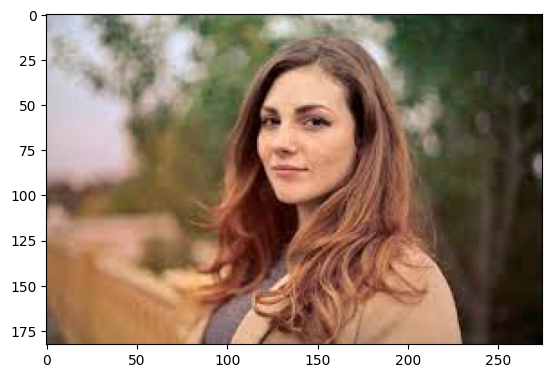

In [ ]:
plt.imshow(img)

array([[[192, 188, 183],
        [193, 189, 184],
        [195, 189, 184],
        ...,
        [  0,  16,   7],
        [  0,  16,   5],
        [  0,  16,   5]],

       [[193, 187, 182],
        [194, 188, 183],
        [195, 189, 184],
        ...,
        [  0,  17,   8],
        [  0,  17,   6],
        [  0,  17,   6]],

       [[194, 185, 181],
        [195, 186, 182],
        [196, 187, 183],
        ...,
        [  2,  19,  10],
        [  2,  19,  10],
        [  2,  19,  10]],

       ...,

       [[ 62,  73,  81],
        [ 62,  73,  81],
        [ 61,  71,  81],
        ...,
        [  3,   5,   5],
        [  3,   6,   4],
        [  3,   6,   4]],

       [[ 65,  72,  81],
        [ 62,  71,  80],
        [ 64,  70,  81],
        ...,
        [  2,   4,   4],
        [  2,   5,   3],
        [  2,   5,   3]],

       [[ 68,  74,  81],
        [ 65,  73,  80],
        [ 67,  72,  81],
        ...,
        [  1,   3,   3],
        [  1,   4,   2],
        [  1,   4,   2]]], dtype=uint8)
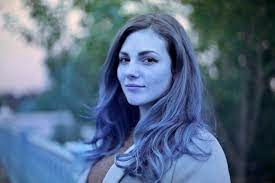

In [ ]:
i1 = cv2.imread(r'/content/drive/MyDrive/CHN/training/happy/images (3).jpg')
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255

In [ ]:
i1.shape
# shape of your image height, weight, rgb

(183, 275, 3)

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [ ]:
train_dataset = train.flow_from_directory(r'/content/drive/MyDrive/CHN/training',
                                         target_size = (200,200),
                                         batch_size = 32,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'/content/drive/MyDrive/CHN/validation',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 12 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [ ]:
train_dataset.class_indices

{'.ipynb_checkpoints': 0, 'happy': 1, 'sad': 2}

In [ ]:
train_dataset.classes

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [22]:
model_fit = model.fit(train_dataset,epochs = 12)

Epoch 1/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5000 - loss: -58300.3086
Epoch 2/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5000 - loss: -88264.1250
Epoch 3/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5000 - loss: -128013.1172
Epoch 4/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5000 - loss: -179178.9531
Epoch 5/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5000 - loss: -243599.6094
Epoch 6/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5000 - loss: -322754.7188
Epoch 7/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5000 - loss: -418171.7500
Epoch 8/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5000 - loss: -531516.3125
Epoch 9/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5000 - loss: -664453.3125
Epoch 10/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5000 - loss: -818692.1875
Epoch 11/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5000 - loss: -995982.1875
Epoch 12/1

In [26]:
dir_path = r'/content/drive/MyDrive/CHN/testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

images (1).jpg
images (3).jpg
images (2).jpg
images.jpg
images (4).jpg
istockphoto-1446934118-612x612.jpg
portrait-of-a-sad-elderly-woman-posing-at-home-photo.jpg
portrait-young-woman-dark-brown-hair-25439859.webp
sad-young-teen-age-girl-close-up-portrait-woman-meditating-outdoor-scene-copy-space-problems-156077966.webp
thinking-woman-outdoors-5508085.webp
prague-czech-republic-march-31-2019-sasa-hendruk-legendar-czech-spiritual-teacher-talking-in-dayal-studio-in-prague-T3GX3G.jpg
sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg


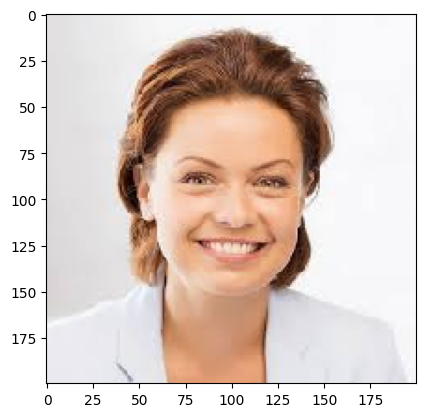

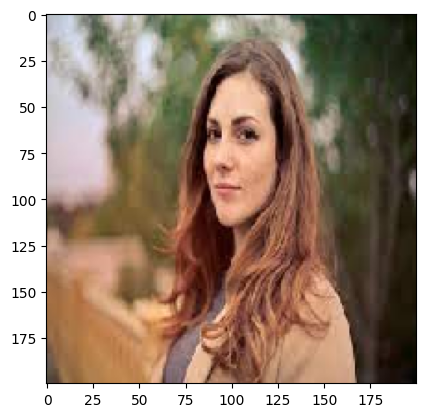

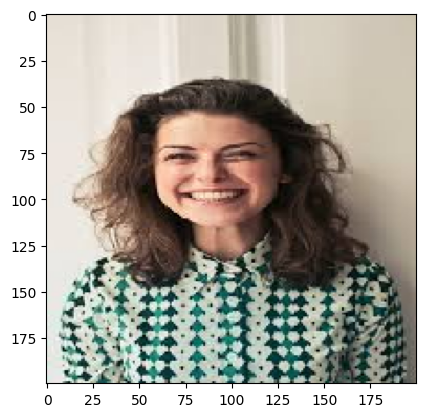

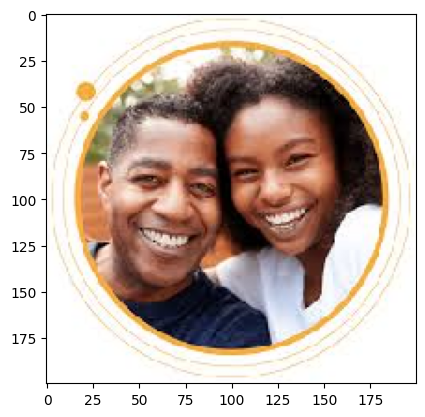

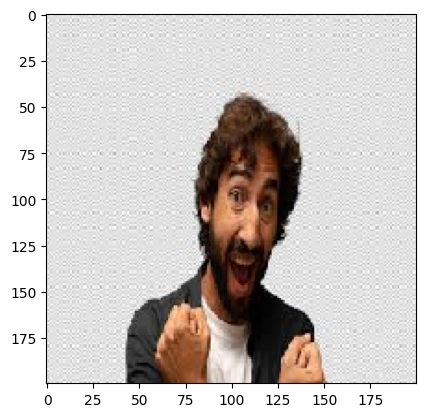

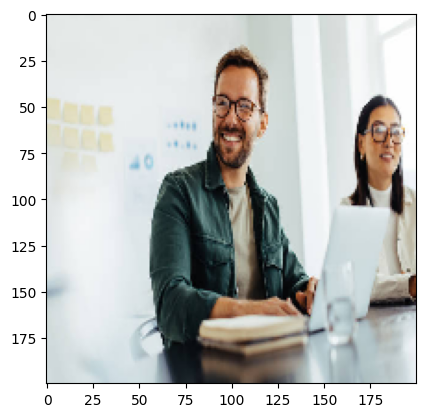

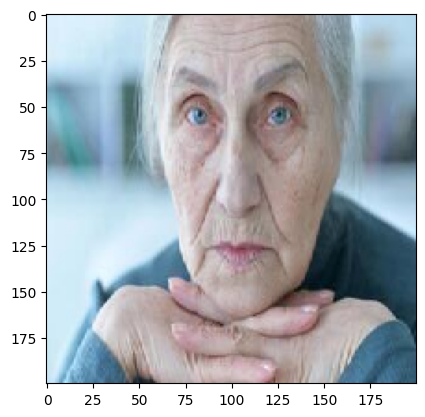

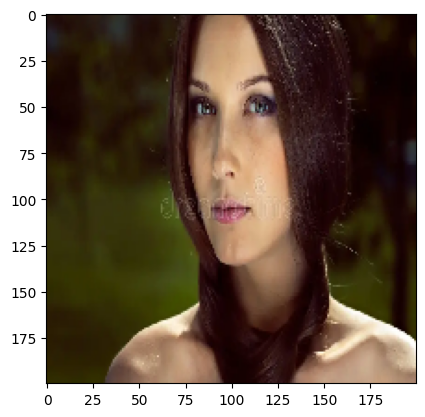

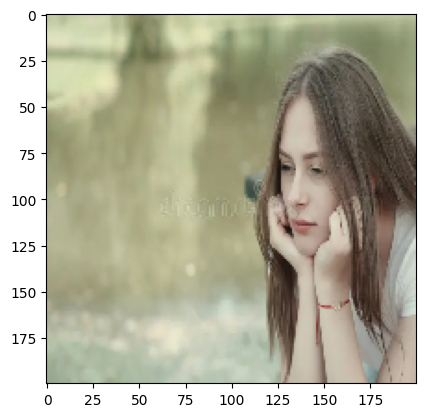

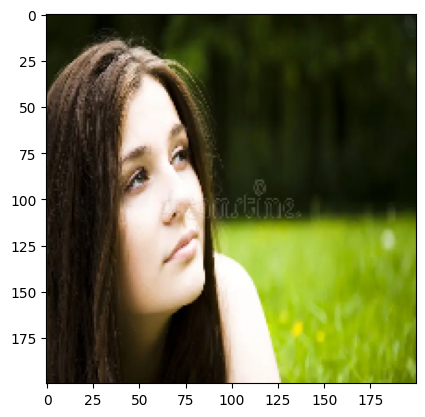

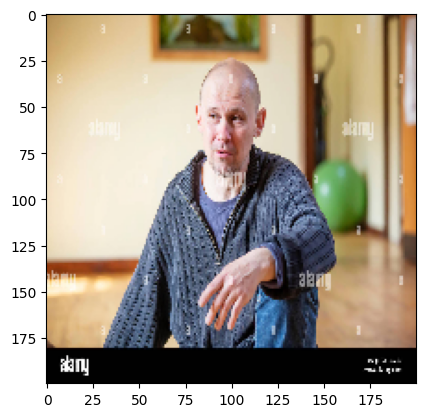

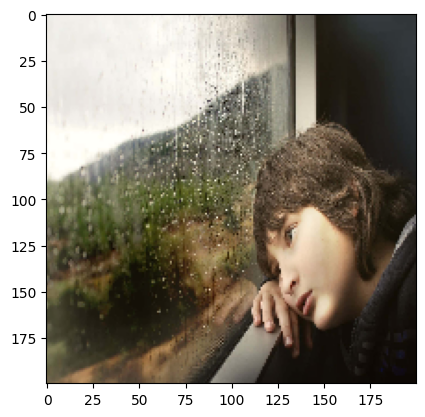

In [27]:
dir_path = r'/content/drive/MyDrive/CHN/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

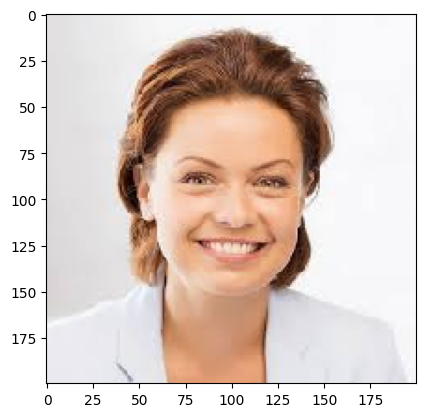

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
i am happy


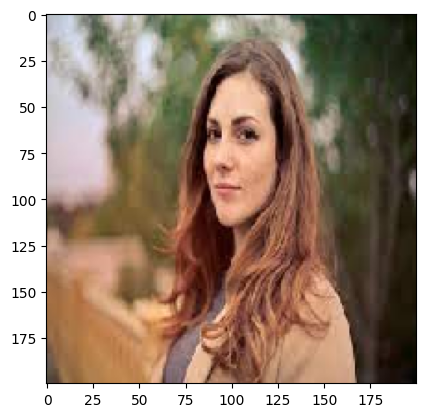

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
i am happy


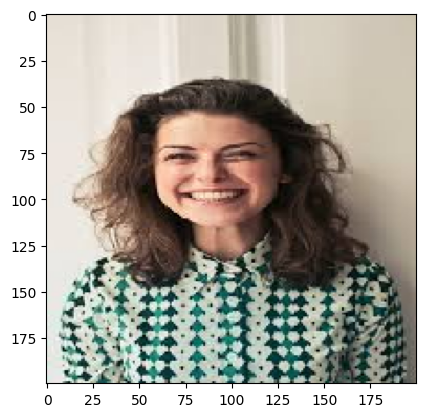

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
i am happy


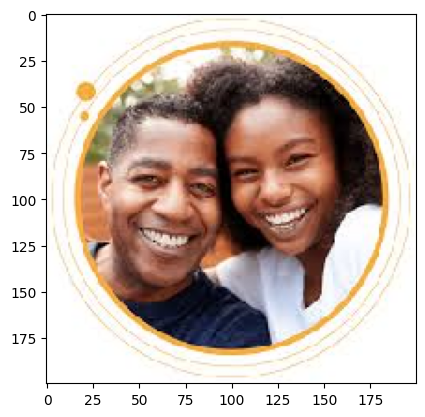

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
i am happy


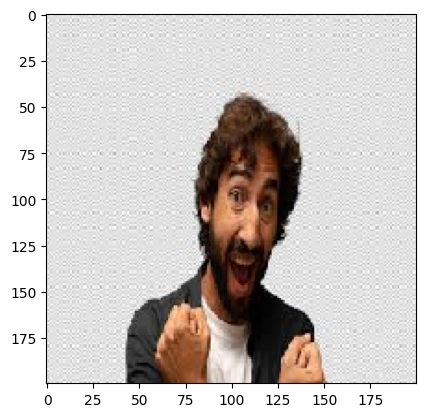

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
i am happy


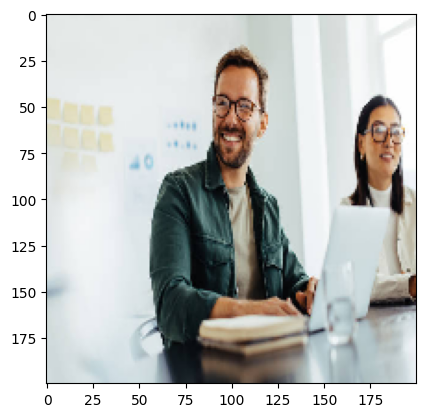

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
i am happy


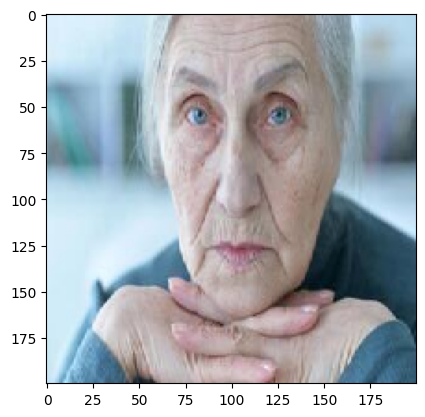

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
i am happy


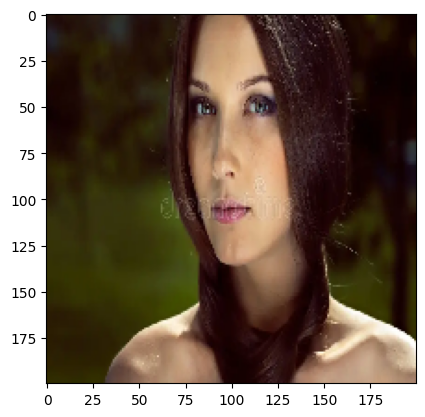

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
i am happy


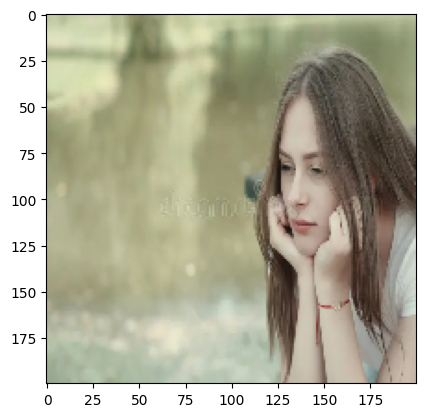

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
i am happy


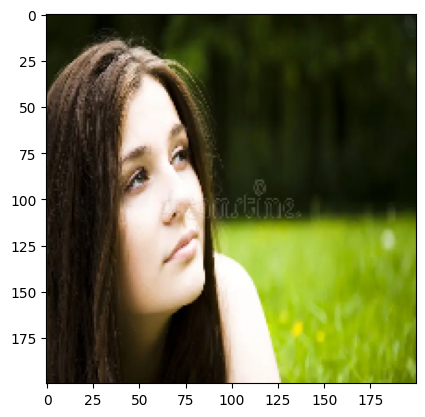

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
i am happy


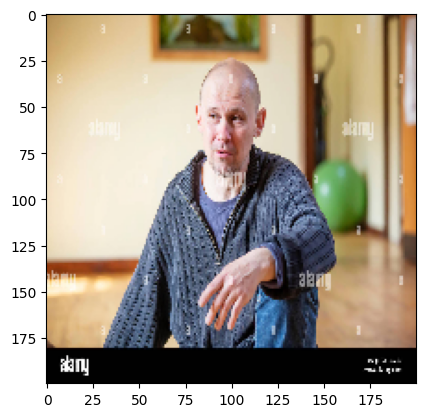

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
i am happy


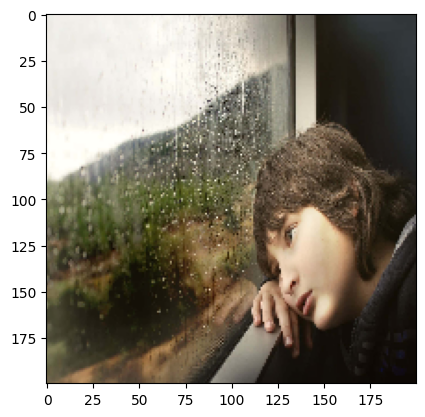

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
i am happy


In [29]:
dir_path = r'/content/drive/MyDrive/CHN/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')